In [1]:
# magic
%matplotlib inline

# imports
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# from IPython.display import SVG, display # svg images
import graphviz as gv
import random as rand
from math import *

# my libraries
from mcr import *

# make figures large enough
from pylab import rcParams
rcParams['figure.figsize'] = (10, 10)

In [ ]:
# Create an empty square
square = MCR()

In [ ]:
# Add a couple of shapes to the square
shape1 = Polygon([(0.2,0.2), (0.2, 0.7), (0.7,0.7), (0.7,0.2)])
shape2 = Polygon([(0.5,0.15), (1.0,0.15), (.75, .87)])

square.add_obstacle(shape1)
square.add_obstacle(shape2)

# Add a start and goal
square.start = (0.05, 0.05)
square.goal  = (0.95, 0.95)

In [ ]:
square.show_bare_obstacles()

In [ ]:
# Display the MCR
square.show_obstacles()

In [ ]:
square.construct_overlaps()

In [ ]:
square.obstacles

In [ ]:
svg_square = mcr(svg='path/to/missing.svg')

In [ ]:
straws = MCR(svg='straws.svg')

In [ ]:
straws.show_obstacles()

In [ ]:
ten = list(filter(lambda x:x.label == '10', straws.overlapped_obstacles))[0]

In [ ]:
ten

In [ ]:
twenty = list(filter(lambda x:x.label == '20', straws.overlapped_obstacles))[0]

In [ ]:
twenty

In [ ]:
straws.show_bare_obstacles()

In [ ]:
straws.obstacles

In [ ]:
shapes = MCR(svg='shapes.svg')

In [ ]:
shapes.show_obstacles()

In [ ]:
shapes.obstacles

In [ ]:
for s in shapes.obstacles:
    print(s.exterior)

Done!


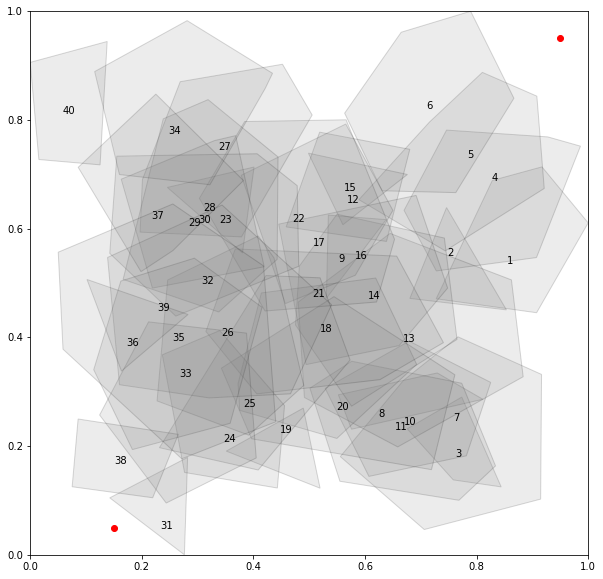

In [3]:
f = random_MCR(40)
f.show_bare_obstacles(labels=True)

In [7]:
r = f.obstacles[15] - f.obstacles[7]

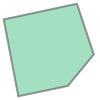

In [11]:
f.obstacles[15]

In [8]:
type(r)

shapely.geometry.polygon.Polygon

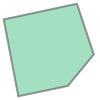

In [10]:
r

In [ ]:
for p in r:
    print(p)

In [ ]:
rotations = MCR(svg='rotation.svg')
rotations.show_obstacles()

In [ ]:
MCR

In [ ]:
__debug__